In [2]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\rohit\AppData\Local\Temp\ipykernel_11068\2783598939.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = load_diabetes()

In [4]:
X=data.data
Y=data.target

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

In [7]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [8]:
L.fit(X_train,Y_train)

LinearRegression()

In [9]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [11]:
y_pred=L.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(Y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [35]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.01)
R.fit(X_train,Y_train)

Ridge(alpha=0.01)

In [36]:
print(R.coef_)
print(R.intercept_)

[  26.26181052 -240.39934227  496.57507972  326.6599829  -420.98179086
  137.89180358  -53.05692237  194.22314385  581.45028172   94.31369289]
152.08329034119228


In [37]:
y_pred1=R.predict(X_test)
print("R2 score",r2_score(Y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred1)))

R2 score 0.5230847087541542
RMSE 48.510284264409194


Random Data representation

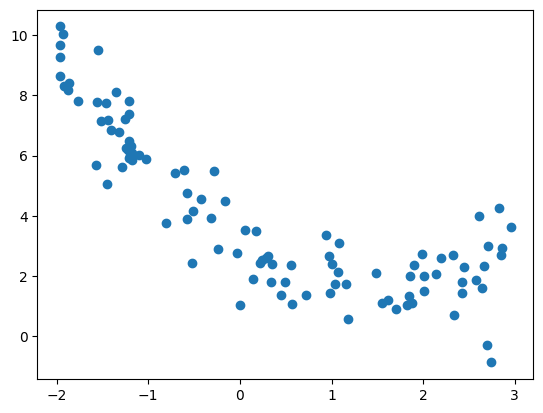

In [18]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

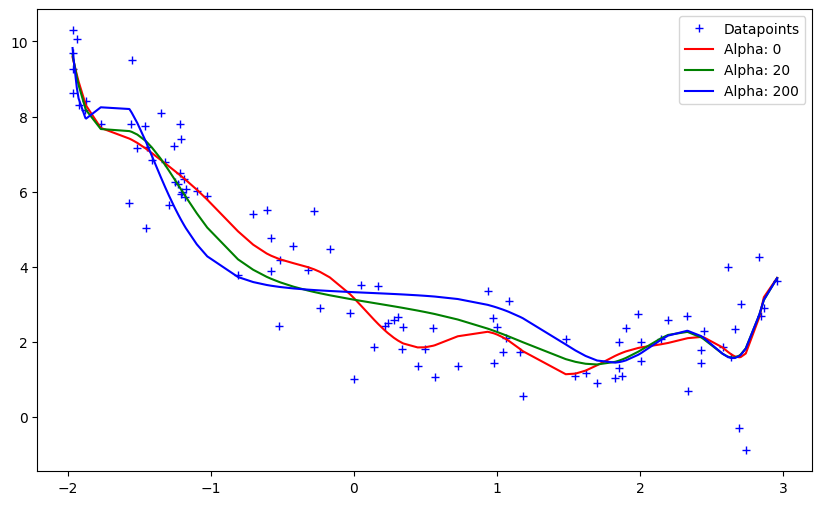

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

KEY TAKEAWAYS

1. The coefficients will go towards 0 but will never be actually 0 as the value of lambda (alpha) increases from 0 to infinity
2. Higher coefficient values are impacted more i.e. show sharp changes towards 0
3. If lambda value is very less then bias will reduce and variance will increase (Overfitting) while if lambda value is large bias will increase and variance will reduce (Underfitting)
4. Loss Function changes to have lambda value with b as constant and m changing